Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load the Dataset

In [4]:
# Load the dataset
file_path = 'C:\\Users\\MOHDANUSARSHAD\\Downloads\\Mobile-Price-Prediction-cleaned_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


Step 3: Explore the Data

In [6]:
# Check for missing values
print(data.isnull().sum())




Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64


In [7]:
# Get a summary of the dataset
print(data.describe())



          Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  807.000000  807.000000  807.000000   807.000000   807.000000   
mean     4.112639    5.941760   64.390335     5.620660    47.821561   
std      0.367830    2.056359   53.868626     3.957409    11.155916   
min      2.800000    0.000000    2.000000     2.000000     5.000000   
25%      3.900000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   32.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   12.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power          Price  
count  807.000000     807.000000     807.000000  
mean     8.868649    3278.859975   14269.167286  
std      4.547254     937.628801   23092.739983  
min      0.000000    1020.000000     479.000000  
25%      8.000000    3000.000000     984.000000  
50%      8.000000    3000.000000    1699.000000  
75%     12

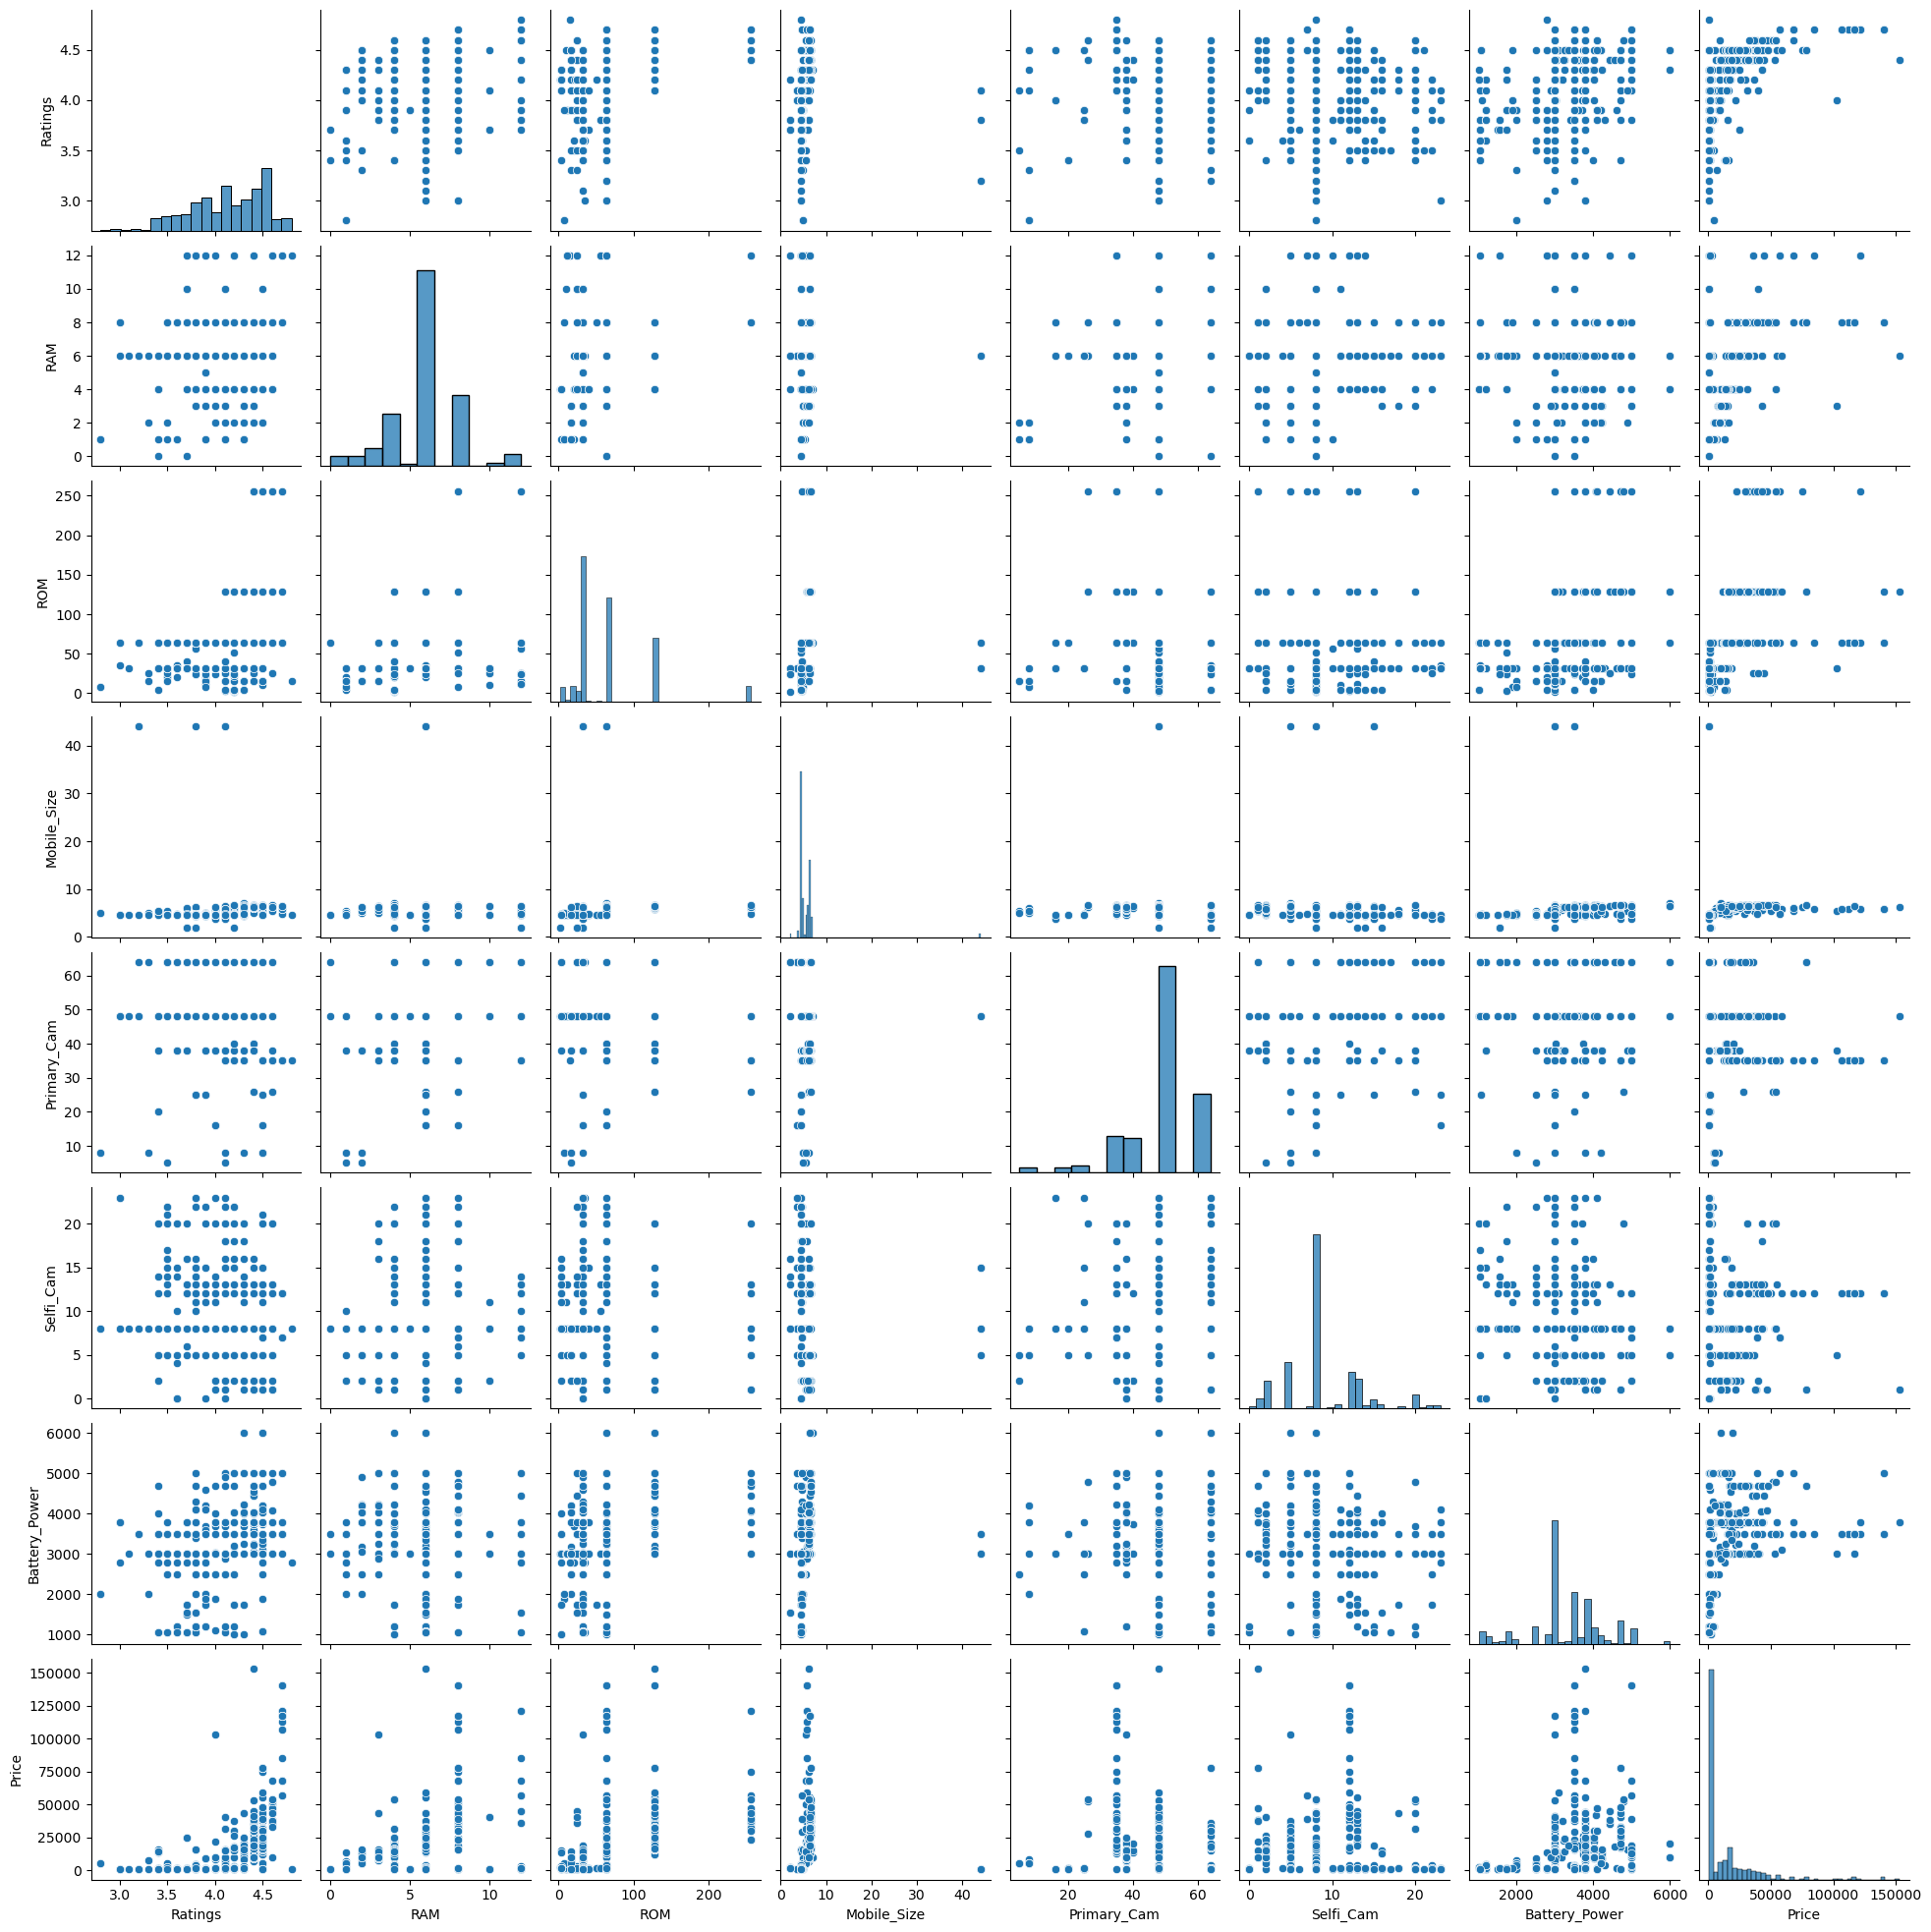

In [9]:
# Visualize the relationships between features and the target variable
sns.pairplot(data)
plt.show()

Step 4: Prepare the Data

In [11]:
# Select features and target variable
# Assuming 'price' is the target variable and others are features
features = data.drop('Price', axis=1)
target = data['Price']




In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Step 5: Train the Model

In [13]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)


Step 7: Evaluate the Model

In [18]:
# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# High R² (close to 1) + Low RMSE/MAE: Your model is very precise. Low R² + High RMSE/MAE: Your model isn’t very precise.

Mean Squared Error: 239357657.43148652
R-squared: 0.4332281397209131


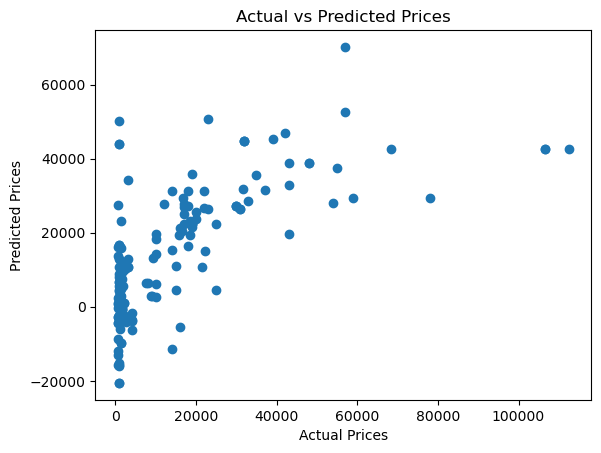

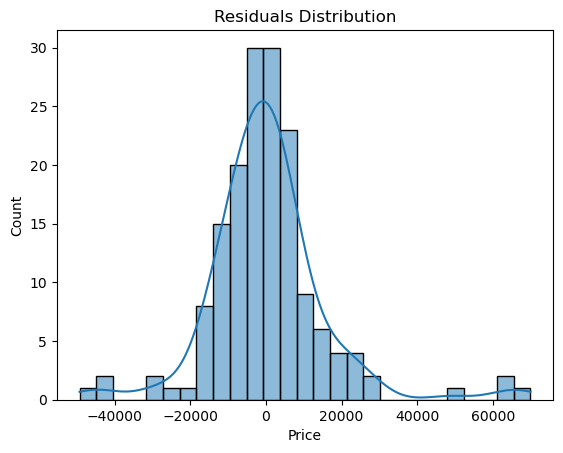

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


Implementing Ridge Regression

In [20]:
from sklearn.linear_model import Ridge


In [21]:
# Initialize the Ridge Regression model with an alpha value (regularization strength)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value to see what works best

# Train the model
ridge_model.fit(X_train, y_train)


Ridge()

In [22]:
# Make predictions on the test set
y_ridge_pred = ridge_model.predict(X_test)


In [23]:
# Calculate the Mean Squared Error (MSE) and R-squared (R²) for the Ridge model
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f"Ridge Regression - Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression - R-squared: {ridge_r2}")


Ridge Regression - Mean Squared Error: 238951584.5160481
Ridge Regression - R-squared: 0.4341896744558438


In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_poly_test)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression - Mean Squared Error: {poly_mse}")
print(f"Polynomial Regression - R-squared: {poly_r2}")


Polynomial Regression - Mean Squared Error: 186330602.51652226
Polynomial Regression - R-squared: 0.5587902081409648


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")


Random Forest - Mean Squared Error: 79612270.62838449
Random Forest - R-squared: 0.8114871476881527
